## Polynomial Ridge Regression
***


In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from supervised_learning.regression import PolynomialRidgeRegression
from utils.data_manipulation import normalize, train_test_split, polynomial_features, KFold
from utils.data_operation import mean_squared_error
from utils.misc import Plot

%load_ext autoreload
%autoreload 2


In [2]:
data = pd.read_csv('../examples/data/TempLinkoping2016.txt', sep='\t')

time = np.atleast_2d(data['time'].values).T
temp = data['temp'].values

X = time
y = temp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
poly_degree = 15

# Finding regularization constant using cross validation
lowest_error = float('inf')
best_reg_factor = None
print("Finding regularization constant using cross validation")
k = 10
for reg_factor in np.arange(0, 0.1, 0.01):
    cross_validation_sets = KFold(X_train, y_train, k)
    mse = 0
    for _X_train, _X_test, _y_train, _y_test in cross_validation_sets:
        model = PolynomialRidgeRegression(
            degree=poly_degree,
            reg_factor=reg_factor,
            learning_rate=0.001,
            n_iterations=10000
        )
        model.fit(_X_train, _y_train)
        y_pred = model.predict(_X_test)
        _mse = mean_squared_error(_y_test, y_pred)
        mse += _mse
    mse /= k

    # Print mean squared error
    print("\tMean Squared Error: %s (regularization: %s)" % (mse, reg_factor))

    if mse < lowest_error:
        best_reg_factor = reg_factor
        lowest_error = mse

Finding regularization constant using cross validation


/Users/juan19.99/Documents/UniHeidelberg/ML-From-Scratch/utils/data_manipulation.py:222: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sets)


	Mean Squared Error: 11.614839541002322 (regularization: 0.0)
	Mean Squared Error: 11.748407323366395 (regularization: 0.01)
	Mean Squared Error: 11.399213041154658 (regularization: 0.02)
	Mean Squared Error: 11.796530003839765 (regularization: 0.03)
	Mean Squared Error: 11.769961292678422 (regularization: 0.04)
	Mean Squared Error: 11.780503949909406 (regularization: 0.05)
	Mean Squared Error: 12.200132753504722 (regularization: 0.06)
	Mean Squared Error: 11.824231702036034 (regularization: 0.07)
	Mean Squared Error: 11.898471610279795 (regularization: 0.08)
	Mean Squared Error: 12.082273408494723 (regularization: 0.09)


In [4]:
model = PolynomialRidgeRegression(
    degree=poly_degree,
    reg_factor=best_reg_factor,
    learning_rate=0.001,
    n_iterations=10000
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %s (given by reg. factor: %s)" % (mse, best_reg_factor))


Mean Squared Error: 13.194734963427708 (given by reg. factor: 0.02)


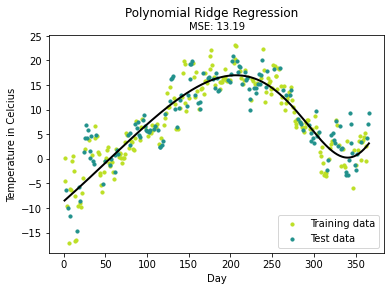

In [5]:
y_pred_line = model.predict(X)

# Color map
cmap = plt.get_cmap('viridis')

# Plot results
m1 = plt.scatter(366 * X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(366 * X_test, y_test, color=cmap(0.5), s=10)
plt.plot(366 * X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.suptitle("Polynomial Ridge Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.xlabel("Day")
plt.ylabel("Temperature in Celcius")
plt.legend((m1, m2), ("Training data", "Test data"), loc='lower right')
plt.show()
